# **Week 1: Introduction to Financial Data Analysis and Python Basics (Beginner Level)**

## **Contents**
- Numpy
- Pandas

## Numpy in Finance

In [80]:
# Generating Random Numbers
import numpy as np

random_numbers = np.random.rand(10)  # Generate 1000 random numbers from a uniform distribution between 0 and 1
print(random_numbers)

[0.77914227 0.73948427 0.28437597 0.78569466 0.18355496 0.28246366
 0.96992758 0.07564049 0.03796548 0.5766245 ]


In [81]:
#  Reshaping Arrays
import numpy as np

data = np.array([1, 2, 3, 4, 5, 6])
reshaped_data = np.reshape(data, (2, 3))
print(reshaped_data)

[[1 2 3]
 [4 5 6]]


In [1]:
# Computing Mean and Standard Deviation
import numpy as np

returns = np.array([0.05, -0.02, 0.03, 0.01, -0.04])
mean_return = np.mean(returns)
# standard deviation measures the fluctuation in the fund's share price or returns over time, that how much it away from mean.
std_deviation = np.std(returns) # It's not Alpha or Beta in Finance

print(mean_return)
print(std_deviation)

0.005999999999999998
0.032619012860600184


COV-  0.00047
CORR-  0.8497831579263382


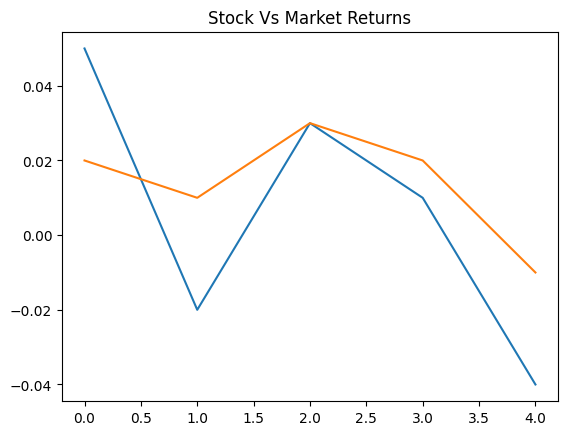

In [25]:
# Calculating Covariance and Correlation
import numpy as np
import matplotlib.pyplot as plt

stock_returns = np.array([0.05, -0.02, 0.03, 0.01, -0.04])
market_returns = np.array([0.02, 0.01, 0.03, 0.02, -0.01])

# covariance (-inf to +inf) can predict how two stocks might perform relative to each other in the future. It determine if stocks' returns tend to move with or against each other.
covariance = np.cov(stock_returns, market_returns)[0, 1]

# Scaled version of covariance as it does not affect by change in scale and limit from -1 to +1.
correlation = np.corrcoef(stock_returns, market_returns)[0, 1]
print("COV- ",covariance)
print("CORR- ",correlation)

plt.plot(stock_returns)
plt.plot(market_returns)
plt.title("Stock Vs Market Returns")
plt.show()

[0.04741069 0.05442479 0.03741865 0.03847234 0.0591147  0.05805019
 0.02591801 0.01869803 0.05792194 0.03022023 0.0634055  0.07097582]


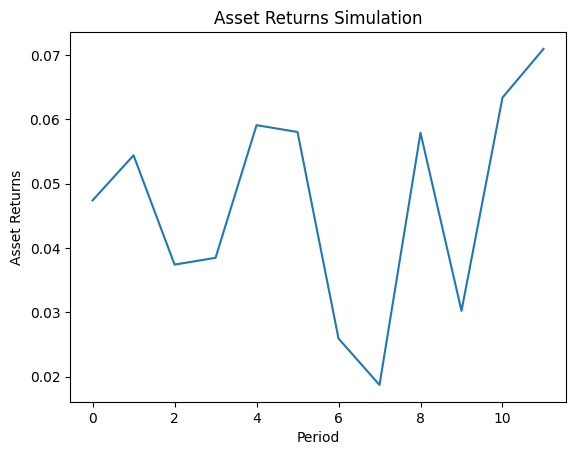

In [16]:
# Simulating Asset Returns
import numpy as np
import matplotlib.pyplot as plt
mean = 0.05
std_dev = 0.02
num_periods = 12

asset_returns = np.random.normal(mean, std_dev, num_periods)
print(asset_returns)

plt.plot(list(range(num_periods)), asset_returns)
plt.xlabel("Period")  # add X-axis label
plt.ylabel("Asset Returns")  # add Y-axis label
plt.title("Asset Returns Simulation")  # add title
plt.show()

In [27]:
# Performing Matrix Operations
import numpy as np

matrix_a = np.array([[1, 2], [3, 4]])
matrix_b = np.array([[5, 6], [7, 8]])

matrix_sum = np.add(matrix_a, matrix_b)
matrix_product = np.dot(matrix_a, matrix_b)
print(matrix_sum)
print("-----------")
print(matrix_product)

[[ 6  8]
 [10 12]]
-----------
[[19 22]
 [43 50]]


In [36]:
# Calculating Present Value
import numpy_financial as nf
rate = 0.06
nper = 10
pmt = -200
fv = 200000

# Present value (PV) is the current value of a future sum of money or stream of cash flows given a specified rate of return.
present_value = nf.pv(rate/12, nper*12, pmt, fv)
print(present_value)

-91911.85600739928


[1.01124421 1.02118894 1.00151892 0.98853205 0.9897496  1.01623911
 1.00059432 1.02368863 1.00315149 0.98330079 0.99460988 0.99355924]
[101.12442066 103.2671396  103.42399426 102.23793353 101.18995378
 102.83318869 102.89430473 105.33173012 105.66368166 103.89918135
 103.33915202 102.67356979]


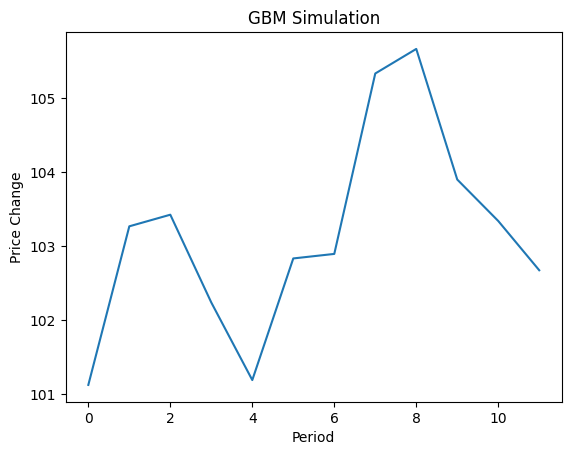

In [49]:
# Simulating Geometric Brownian Motion (GBM)
import numpy as np

initial_price = 100.0
drift = 0.01
volatility = 0.05
num_periods = 12

# Geometric Brownian motion is a widely used mathematical model for asset prices with the assumption of their constant volatilities.
periodic_returns = np.random.normal(drift/num_periods, volatility/np.sqrt(num_periods), num_periods) + 1
price_change = initial_price * np.cumprod(periodic_returns)

print(periodic_returns)
print(price_change)

plt.plot(list(range(num_periods)), price_change)
plt.xlabel("Period")  # add X-axis label
plt.ylabel("Price Change")  # add Y-axis label
plt.title("GBM Simulation")  # add title
plt.show()

VAR at 95%:  16.44853626951476
1 day VaR @ 95% confidence: 16.45
2 day VaR @ 95% confidence: 23.26
3 day VaR @ 95% confidence: 28.49
4 day VaR @ 95% confidence: 32.9
5 day VaR @ 95% confidence: 36.78
6 day VaR @ 95% confidence: 40.29
7 day VaR @ 95% confidence: 43.52
8 day VaR @ 95% confidence: 46.52
9 day VaR @ 95% confidence: 49.35
10 day VaR @ 95% confidence: 52.01
11 day VaR @ 95% confidence: 54.55
12 day VaR @ 95% confidence: 56.98
13 day VaR @ 95% confidence: 59.31
14 day VaR @ 95% confidence: 61.54
15 day VaR @ 95% confidence: 63.7


Text(0.5, 1.0, 'Max portfolio loss (VaR) over 15-day period')

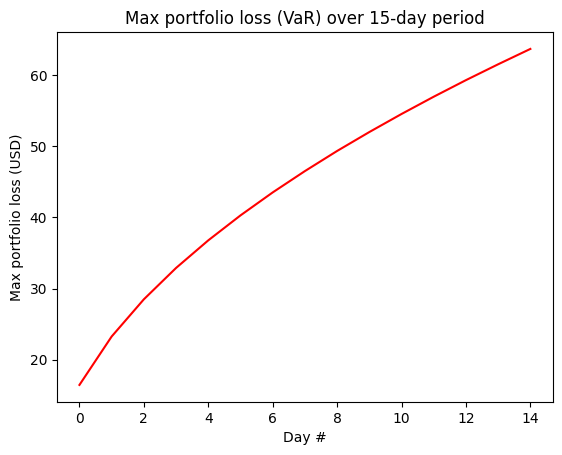

In [78]:
# Calculating Value at Risk (VaR)
import numpy as np
from scipy.stats import norm

confidence_level = 0.05 #95%
initial_investment = 2000
mean_investment = 2000
std_investment = 10

"""Value at risk (VaR) is a measure of the risk of loss for investments. It estimates how much a set of investments might lose (with a given probability), 
given normal market conditions, in a set time period such as a day."""
cutoff = norm.ppf(confidence_level, mean_investment, std_investment)
var_1d1 = initial_investment - cutoff
print("VAR at 95%: ",var_1d1)

var_array = []
num_days = int(15)
for x in range(1, num_days+1):    
    var_array.append(np.round(var_1d1 * np.sqrt(x),2))
    print(str(x) + " day VaR @ 95% confidence: " + str(np.round(var_1d1 * np.sqrt(x),2)))

# Build plot
plt.plot(list(range(num_days)),var_array,"r")
plt.xlabel("Day #")
plt.ylabel("Max portfolio loss (USD)")
plt.title("Max portfolio loss (VaR) over 15-day period")

In [82]:
# Calculating Exponential Moving Average (EMA)
import numpy as np

price_series = np.array([100, 105, 102, 98, 100, 104, 107])
period = 3

weights = np.exp(np.linspace(-1., 0., period))
weights /= np.sum(weights)

# The exponential moving average (EMA) is a technical chart indicator that tracks the price of an investment (like a stock or commodity) over time.
ema = np.convolve(price_series, weights, mode='valid')
print(ema)

[101.90862688 102.77414628 100.39856901  99.73233411 102.53304961]


In [1]:
# Value Investment Strategy

import numpy as np

prices = np.array([100, 90, 80, 120, 150, 110])
book_values = np.array([80, 85, 90, 100, 120, 130])

price_to_book_ratio = prices / book_values
undervalued_stocks = price_to_book_ratio < 1

selected_stocks = prices[undervalued_stocks]
print(selected_stocks)

[ 80 110]


## Advance use cases of Numpy in Finance

In [86]:
# Portfolio Optimisation

import numpy as np

"""
Markowitz created a formula that allows an investor to mathematically trade off risk tolerance and reward expectations, resulting in the ideal portfolio.

This theory was based on two main concepts:

1. Every investor’s goal is to maximize return for any level of risk
2. Risk can be reduced by diversifying a portfolio through individual, unrelated securities
"""

# Define expected returns, covariance matrix, and risk tolerance
expected_returns = np.array([0.05, 0.03, 0.06])
covariance_matrix = np.array([[0.04, 0.02, 0.01], [0.02, 0.06, 0.03], [0.01, 0.03, 0.05]])
risk_tolerance = 0.05

# Perform portfolio optimization
num_assets = len(expected_returns)

# Define the objective function to minimize portfolio risk
def portfolio_risk(weights):
    return np.sqrt(np.dot(weights.T, np.dot(covariance_matrix, weights)))

# Define the constraint function for the sum of weights to be 1
def constraint_sum_of_weights(weights):
    return np.sum(weights) - 1.0

# Use scipy.optimize.minimize to find the minimum-risk portfolio
from scipy.optimize import minimize

# Set the initial weights to be equal weights
initial_weights = np.array([1 / num_assets] * num_assets)

# Define the bounds for each weight (0 to 1)
bounds = [(0, 1)] * num_assets

# Define the constraint dict for the sum of weights
constraint = {'type': 'eq', 'fun': constraint_sum_of_weights}

# Minimize the portfolio risk under the given constraints
result = minimize(portfolio_risk, initial_weights, method='SLSQP', bounds=bounds, constraints=constraint)

# Extract the optimized weights and calculate the portfolio return and risk
weights = result.x
portfolio_return = np.dot(weights, expected_returns)
portfolio_risk = np.sqrt(np.dot(weights.T, np.dot(covariance_matrix, weights)))

print(weights)
print(portfolio_return)
print(portfolio_risk)

[0.53974073 0.07552603 0.38473324]
0.052336811718006464
0.16408285049858687


In [87]:
# Black-Scholes Option Pricing Model
import numpy as np
from scipy.stats import norm

"""
This model is used to find the current value of a call option whose ultimate value depends on the price of the stock at the expiration date. 
Because the stock price keeps changing, the value of this call option will change too
"""

"""
This function calculates the call and put option prices using the Black-Scholes formula. It takes the following inputs:

S: Current stock price
K: Strike price of the option
r: Risk-free interest rate
sigma: Volatility of the underlying asset
T: Time to maturity of the option
The function computes d1 and d2, which are intermediate variables used in the Black-Scholes formula. 
Then, it calculates the call and put option prices using the cumulative distribution function (CDF) of the standard normal distribution.
"""

def black_scholes(S, K, r, sigma, T):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    put_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    return call_price, put_price

stock_price = 100.0
strike_price = 105.0
risk_free_rate = 0.05
volatility = 0.2
time_to_maturity = 1.0

call_option_price, put_option_price = black_scholes(stock_price, strike_price, risk_free_rate, volatility, time_to_maturity)
print(call_option_price) # Which Price to Buy
print(put_option_price) # Which Price to Sell

8.021352235143176
7.9004418077181455


Text(0.5, 1.0, 'Monte Carlo Simulation for Risk Analysis')

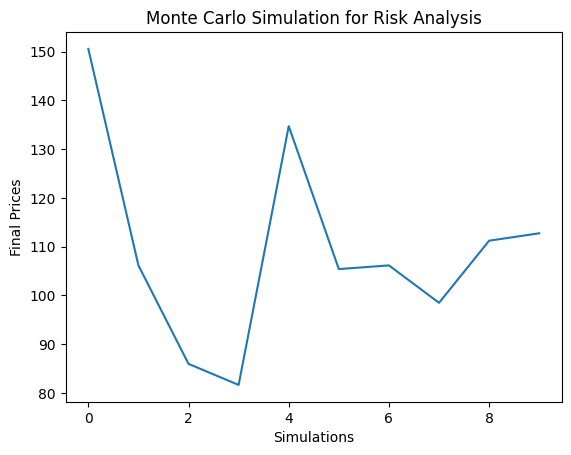

In [94]:
# Monte Carlo Simulation for Risk Analysis

"""
Monte Carlo simulation performs risk analysis by building models of possible results 
by substituting a range of values—called a probability distribution—for any factor that has inherent uncertainty.
"""

import numpy as np

initial_price = 100.0
drift = 0.05
volatility = 0.2
time_horizon = 1.0
num_simulations = 10
num_periods = 24

daily_returns = np.random.normal(drift/num_periods, volatility/np.sqrt(num_periods), (num_periods, num_simulations)) + 1
price_series = initial_price * np.cumprod(daily_returns, axis=0)

final_prices = price_series[-1]
mean_price = np.mean(final_prices)
std_deviation = np.std(final_prices)

plt.plot(final_prices)
plt.xlabel("Simulations")
plt.ylabel("Final Prices")
plt.title("Monte Carlo Simulation for Risk Analysis")

## Pandas in Finance

In [20]:
import pandas as pd

# Assuming we have a DataFrame with stock data
# Dummy data
data = ['2023-05-21', '2023-05-22', '2023-05-23', '2023-05-23', '2023-05-23',
        '2023-05-25', '2023-05-26', '2023-05-26', '2023-05-27', '2023-05-30']
stock_names = ['ABC', 'XYZ', 'DEF', 'GHI', 'JKL', 'MNO', 'PQR', 'STU', 'VWX', 'YZA']
sector = ['IT','Finance','IT','Finance','IT','Energy','Retail','Data Science','AI','Finance']
prices = [100.50, 75.20, 120.80, 50.75, 90.25, 110.10, 85.60, 95.30, 105.80, 65.40]

# Create dataframe
df = pd.DataFrame({'Date': data, 'Stock Names': stock_names, 'Price': prices, 'Sector':sector})

# Grouping data by sector and calculating average price
avg_price_by_sector = df.groupby('Sector')['Price'].mean()
print(avg_price_by_sector)

Sector
AI              105.800000
Data Science     95.300000
Energy          110.100000
Finance          63.783333
IT              103.850000
Retail           85.600000
Name: Price, dtype: float64


In [5]:
# Data Cleaning and Transformation
# Removing rows with missing values
df.dropna(inplace=True) # Watch Video Link in Description

# Converting date column to datetime format
df['Date'] = pd.to_datetime(df['Date']) # Watch Vidoe Link in Description
df.head()

,Date,Stock Names,Price,Sector
0,2023-05-21,ABC,100.50,IT
1,2023-05-22,XYZ,75.20,Finance
2,2023-05-23,DEF,120.80,IT
3,2023-05-23,GHI,50.75,Finance
4,2023-05-23,JKL,90.25,IT


In [6]:
# Time Series Resampling and Aggregation
# Converting date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Resampling to monthly data and calculating average price
monthly_avg_price = df.resample('M', on='Date')['Price'].mean()
print(monthly_avg_price)

Date
2023-05-31    89.97
Freq: M, Name: Price, dtype: float64


In [11]:
# Rolling Window Analysis
# Calculating 2-day rolling average
df['RollingAvg'] = df['Price'].rolling(window=2).mean()
df

,Date,Stock Names,Price,Sector,RollingAvg
0,2023-05-21,ABC,100.50,IT,NaN
1,2023-05-22,XYZ,75.20,Finance,87.850
2,2023-05-23,DEF,120.80,IT,98.000
3,2023-05-23,GHI,50.75,Finance,85.775
4,2023-05-23,JKL,90.25,IT,70.500
5,2023-05-25,MNO,110.10,Energy,100.175
6,2023-05-26,PQR,85.60,Retail,97.850
7,2023-05-26,STU,95.30,Data Science,90.450
8,2023-05-27,VWX,105.80,AI,100.550
9,2023-05-30,YZA,65.40,Finance,85.600


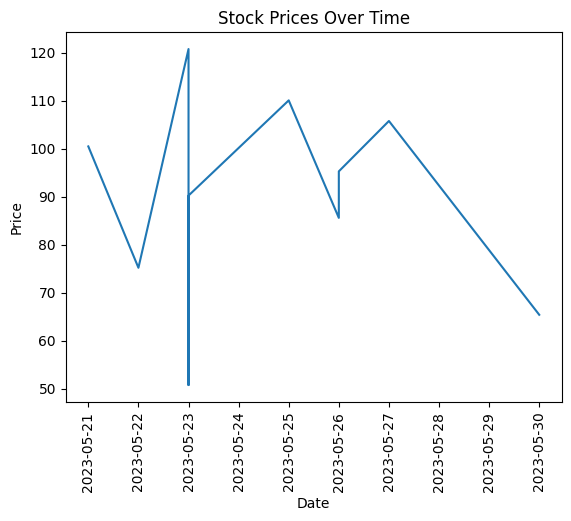

In [16]:
# Data Visualization

import matplotlib.pyplot as plt
# Plotting line chart of stock prices
plt.plot(df['Date'], df['Price'])
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

In [19]:
# Pivot Tables
sales = pd.DataFrame({
    'Category': np.random.choice(['Electronics', 'Clothing', 'Home Decor'], size=10),
    'Month': np.random.choice(['January', 'February', 'March', 'April'], size=10),
    'Sales': np.random.randint(100, 1000, size=10)
})
# Creating a pivot table to summarize sales by product category
pivot_table = sales.pivot_table(values='Sales', index='Category', columns='Month', aggfunc='sum')
print(pivot_table)

Month        April  February  January   March
Category                                     
Clothing     468.0       NaN      NaN     NaN
Electronics  985.0     802.0   1251.0   191.0
Home Decor     NaN       NaN      NaN  1804.0


In [21]:
# Data Filtering and Selection
# Filtering stocks with price above 100
high_priced_stocks = df[df['Price'] > 100]
print(high_priced_stocks)

         Date Stock Names  Price  Sector
0  2023-05-21         ABC  100.5      IT
2  2023-05-23         DEF  120.8      IT
5  2023-05-25         MNO  110.1  Energy
8  2023-05-27         VWX  105.8      AI


In [22]:
# Calculating daily returns
df['Return'] = df['Price'].pct_change()
df

,Date,Stock Names,Price,Sector,Return
0,2023-05-21,ABC,100.50,IT,NaN
1,2023-05-22,XYZ,75.20,Finance,-0.251741
2,2023-05-23,DEF,120.80,IT,0.606383
3,2023-05-23,GHI,50.75,Finance,-0.579884
4,2023-05-23,JKL,90.25,IT,0.778325
5,2023-05-25,MNO,110.10,Energy,0.219945
6,2023-05-26,PQR,85.60,Retail,-0.222525
7,2023-05-26,STU,95.30,Data Science,0.113318
8,2023-05-27,VWX,105.80,AI,0.110178
9,2023-05-30,YZA,65.40,Finance,-0.381853


In [23]:
# Handling Time Zones
# Converting date column to datetime format and setting time zone
df['Date'] = pd.to_datetime(df['Date']).dt.tz_localize('UTC').dt.tz_convert('US/Eastern')
df

,Date,Stock Names,Price,Sector,Return
0,2023-05-20 20:00:00-04:00,ABC,100.50,IT,NaN
1,2023-05-21 20:00:00-04:00,XYZ,75.20,Finance,-0.251741
2,2023-05-22 20:00:00-04:00,DEF,120.80,IT,0.606383
3,2023-05-22 20:00:00-04:00,GHI,50.75,Finance,-0.579884
4,2023-05-22 20:00:00-04:00,JKL,90.25,IT,0.778325
5,2023-05-24 20:00:00-04:00,MNO,110.10,Energy,0.219945
6,2023-05-25 20:00:00-04:00,PQR,85.60,Retail,-0.222525
7,2023-05-25 20:00:00-04:00,STU,95.30,Data Science,0.113318
8,2023-05-26 20:00:00-04:00,VWX,105.80,AI,0.110178
9,2023-05-29 20:00:00-04:00,YZA,65.40,Finance,-0.381853


## Pandas Advance

In [25]:
# Calculating 50-day and 200-day moving averages
df['50-day MA'] = df['Price'].rolling(window=3).mean()
df['200-day MA'] = df['Price'].rolling(window=5).mean()
df

,Date,Stock Names,Price,Sector,Return,50-day MA,200-day MA
0,2023-05-20 20:00:00-04:00,ABC,100.50,IT,NaN,NaN,NaN
1,2023-05-21 20:00:00-04:00,XYZ,75.20,Finance,-0.251741,NaN,NaN
2,2023-05-22 20:00:00-04:00,DEF,120.80,IT,0.606383,98.833333,NaN
3,2023-05-22 20:00:00-04:00,GHI,50.75,Finance,-0.579884,82.250000,NaN
4,2023-05-22 20:00:00-04:00,JKL,90.25,IT,0.778325,87.266667,87.50
5,2023-05-24 20:00:00-04:00,MNO,110.10,Energy,0.219945,83.700000,89.42
6,2023-05-25 20:00:00-04:00,PQR,85.60,Retail,-0.222525,95.316667,91.50
7,2023-05-25 20:00:00-04:00,STU,95.30,Data Science,0.113318,97.000000,86.40
8,2023-05-26 20:00:00-04:00,VWX,105.80,AI,0.110178,95.566667,97.41
9,2023-05-29 20:00:00-04:00,YZA,65.40,Finance,-0.381853,88.833333,92.44


In [40]:
# Portfolio Performance Analysis
dates = pd.date_range(start='2022-01-01', periods=10, freq='D')
portfolio_value = np.random.randint(1000, 5000, size=10)

# Create dataframe
df = pd.DataFrame({'Date': dates, 'Portfolio Value': portfolio_value})

# Calculating portfolio returns
df['Return'] = df['Portfolio Value'].pct_change()

# Calculating portfolio performance metrics
cumulative_return = (1 + df['Return'].iloc[1:]).cumprod() - 1
print(list(cumulative_return))
annualized_return = (1 + list(cumulative_return)[-1]) ** (252/len(df)) - 1
print(annualized_return)
df

[0.8128911138923653, 1.3929912390488108, 1.2171464330413015, 0.30725907384230267, -0.3110137672090113, 0.5400500625782227, 1.2302878598247808, 0.49123904881101366, 0.031914893617021045]
1.2071192205190289


,Date,Portfolio Value,Return
0,2022-01-01,1598,NaN
1,2022-01-02,2897,0.812891
2,2022-01-03,3824,0.319986
3,2022-01-04,3543,-0.073483
4,2022-01-05,2089,-0.410387
5,2022-01-06,1101,-0.472954
6,2022-01-07,2461,1.235241
7,2022-01-08,3564,0.448192
8,2022-01-09,2383,-0.331369
9,2022-01-10,1649,-0.308015


In [41]:
# Event Studies
# Create dummy DataFrame with stock and event data
df = pd.DataFrame({
    'Event': ['Earnings Announcement'] * 10,
    'Stock Return': np.random.uniform(-0.05, 0.05, 10),
    'Market Return': np.random.uniform(-0.03, 0.03, 10)
})

# Filtering data for a specific event
event_df = df[df['Event'] == 'Earnings Announcement']

# Calculating abnormal returns around the event
event_df['Abnormal Return'] = event_df['Stock Return'] - event_df['Market Return']
event_df

,Event,Stock Return,Market Return,Abnormal Return
0,Earnings Announcement,-0.002127,-0.028544,0.026417
1,Earnings Announcement,0.021370,-0.024896,0.046266
2,Earnings Announcement,0.015162,-0.006480,0.021642
3,Earnings Announcement,0.045195,0.008797,0.036397
4,Earnings Announcement,0.048886,-0.014638,0.063524
5,Earnings Announcement,0.007540,0.003330,0.004211
6,Earnings Announcement,-0.014814,-0.027782,0.012969
7,Earnings Announcement,-0.012066,-0.021378,0.009313
8,Earnings Announcement,-0.022036,-0.007873,-0.014163
9,Earnings Announcement,0.036122,0.020976,0.015146


In [42]:
# Risk Analysis and VaR Calculation
# Calculating portfolio volatility
volatility = np.std(df['Stock Return'])

# Calculating Value at Risk (VaR) at a specific confidence level
confidence_level = 0.95
var = np.percentile(df['Stock Return'], 100 - confidence_level * 100)
print(volatility)
print(var)

0.02411869224362329
-0.018786004559938833


In [46]:
# Fundamental Analysis
import random
num_rows = 10
df = pd.DataFrame()  # Limit the DataFrame to the desired number of rows

# Generate random values for Net Income, Revenue, and Shareholders Equity
df['Net Income'] = [random.randint(1000, 10000) for _ in range(num_rows)]
df['Revenue'] = [random.randint(5000, 20000) for _ in range(num_rows)]
df['Shareholders Equity'] = [random.randint(10000, 50000) for _ in range(num_rows)]


# Calculating financial ratios
df['Profit Margin'] = df['Net Income'] / df['Revenue']
df['Return on Equity'] = df['Net Income'] / df['Shareholders Equity']

df.head()

,Net Income,Revenue,Shareholders Equity,Profit Margin,Return on Equity
0,1202,16629,18819,0.072283,0.063872
1,9463,9077,25131,1.042525,0.376547
2,9462,9144,34472,1.034777,0.274484
3,2851,7943,20420,0.358932,0.139618
4,7879,9564,24234,0.823818,0.325122
